## Imported Libraries

In [5]:
import pandas as pd
import csv
import random

import scipy.sparse as sparse
import scipy.sparse.linalg
import math
import matplotlib.pyplot as plt
import numpy.polynomial.hermite as Herm

from matplotlib import animation
from IPython.display import HTML

import numpy as np
from scipy.sparse import diags #Allows us to construct our matrices
from scipy.sparse.linalg import eigsh #Solves the Eigenvalue problem
import matplotlib.pyplot as plt

import os
import time

# Example of Producing Different Datasets

## Simple Dataset #1

In [3]:
data0 = [
    ["Name", "Age", "City"],
    ["Alice", 30, "New York"],
    ["Bob", 25, "Los Angeles"],
    ["Charlie", 35, "Chicago"]
]

In [4]:
with open('example_pandas.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data0)

In [5]:
df0 = pd.DataFrame(data0[1:], columns=data0[0])
df0.to_csv('example_pandas.csv', index=False)

df0 = pd.read_csv('example_pandas.csv')

In [6]:
df0

,Name,Age,City
0,Alice,30,New York
1,Bob,25,Los Angeles
2,Charlie,35,Chicago


## Simple Dataset #2

In [7]:
# Define your data generation function
def generate_complex_data(param):
    return {
        "Param": param,
        "Value1": random.random(),
        "Value2": random.randint(1, 100)
    }

# Collect the data
data1 = []
parameters = range(10)

for param in parameters:
    result = generate_complex_data(param)
    data1.append(result)

# Convert to DataFrame and save to CSV
df1 = pd.DataFrame(data1)
df1.to_csv('complex_dataset.csv', index=False)

df1 = pd.read_csv('complex_dataset.csv')

In [8]:
df1

,Param,Value1,Value2
0,0,0.074885,27
1,1,0.799305,54
2,2,0.059516,18
3,3,0.133134,45
4,4,0.849303,97
5,5,0.984946,46
6,6,0.905528,57
7,7,0.882117,52
8,8,0.484068,33
9,9,0.668305,49


## Dataset With a Matrix

In [9]:
# Define your data generation function
def generate_data_with_matrix(param):
    # Example function that generates a 2x2 matrix
    matrix = np.array([[param, param + 1], [param + 2, param + 3]])
    return {
        "Param": param,
        "Matrix": matrix
    }

# # Function to serialize a matrix to a string
# def matrix_to_string(matrix):
#     return ';'.join([','.join(map(str, row)) for row in matrix])

# Collect the data
data2 = []
parameters = range(5)  # Example range of parameters

for param in parameters:
    result = generate_data_with_matrix(param)
    matrix_str = matrix_to_string(result["Matrix"])
    data2.append({"Param": result["Param"], "Matrix": matrix_str})

# Convert to DataFrame and save to CSV
df2 = pd.DataFrame(data2)
df2.to_csv('dataset_with_matrix.csv', index=False)

df2 = pd.read_csv('dataset_with_matrix.csv') 

NameError: name 'matrix_to_string' is not defined

In [ ]:
df2

,Param,Matrix
0,0,"0,1;2,3"
1,1,"1,2;3,4"
2,2,"2,3;4,5"
3,3,"3,4;5,6"
4,4,"4,5;6,7"


In [10]:
# Function to deserialize a matrix string
def string_to_matrix(matrix_str):
    return np.array([list(map(int, row.split(','))) for row in matrix_str.split(';')])

# Read the CSV file
df2 = pd.read_csv('dataset_with_matrix.csv')

# Convert the string back to a matrix
df2['Matrix'] = df2['Matrix'].apply(string_to_matrix)

In [11]:
df2

,Param,Matrix
0,0,"[[0, 1], [2, 3]]"
1,1,"[[1, 2], [3, 4]]"
2,2,"[[2, 3], [4, 5]]"
3,3,"[[3, 4], [5, 6]]"
4,4,"[[4, 5], [6, 7]]"


## Dataset With a Complex Value

In [12]:
# Define your data generation function
def generate_data_with_complex(param):
    # Example function that generates a complex number
    complex_number = complex(param, param + 1)
    return {
        "Param": param,
        "ComplexNumber": complex_number
    }

# Function to serialize a complex number to a string
def complex_to_string(complex_number):
    return f"{complex_number.real}+{complex_number.imag}j"

# Collect the data
data3 = []
parameters = range(5)  # Example range of parameters

for param in parameters:
    result = generate_data_with_complex(param)
    complex_str = complex_to_string(result["ComplexNumber"])
    data3.append({"Param": result["Param"], "ComplexNumber": complex_str})

# Convert to DataFrame and save to CSV
df3 = pd.DataFrame(data3)
df3.to_csv('dataset_with_complex.csv', index=False)

In [13]:
df3

,Param,ComplexNumber
0,0,0.0+1.0j
1,1,1.0+2.0j
2,2,2.0+3.0j
3,3,3.0+4.0j
4,4,4.0+5.0j


In [14]:
# Function to deserialize a complex number string
def string_to_complex(complex_str):
    real, imag = complex_str.replace('j', '').split('+')
    return complex(float(real), float(imag))

# Read the CSV file
df3 = pd.read_csv('dataset_with_complex.csv')

# Convert the string back to a complex number
df3['ComplexNumber'] = df3['ComplexNumber'].apply(string_to_complex)

In [15]:
df3

,Param,ComplexNumber
0,0,0.0+1.0j
1,1,1.0+2.0j
2,2,2.0+3.0j
3,3,3.0+4.0j
4,4,4.0+5.0j


## Dataset Made of Conmplex Valued Matrix

In [16]:
# Define the matrix
matrix = np.array([[1 + 2j, 3 + 4j], [5 + 6j, 7 + 8j]])

# Function to serialize the complex matrix
def complex_matrix_to_string(matrix):
    return ';'.join([','.join(f"{cell.real}+{cell.imag}j" for cell in row) for row in matrix])

# Function to deserialize the string back to a complex matrix
def string_to_complex_matrix(matrix_str, shape):
    rows = matrix_str.split(';')
    matrix = [list(map(lambda x: complex(*map(float, x[:-1].split('+'))), row.split(','))) for row in rows]
    return np.array(matrix).reshape(shape)

# Serialize the matrix
matrix_str = complex_matrix_to_string(matrix)
print("Serialized Matrix:", matrix_str)

# Example data collection
data5 = [
    {"Param": 1, "Matrix": matrix_str}
]

# Convert to DataFrame and save to CSV
df5 = pd.DataFrame(data5)
df5.to_csv('complex_matrix_dataset.csv', index=False)

# Read the CSV file
df5 = pd.read_csv('complex_matrix_dataset.csv')



Serialized Matrix: 1.0+2.0j,3.0+4.0j;5.0+6.0j,7.0+8.0j


In [17]:
df5

,Param,Matrix
0,1,"1.0+2.0j,3.0+4.0j;5.0+6.0j,7.0+8.0j"


In [18]:
# Deserialize the matrix
df5['Matrix'] = df5['Matrix'].apply(lambda x: string_to_complex_matrix(x, (2, 2)))

In [19]:
df5

,Param,Matrix
0,1,"[[(1+2j), (3+4j)], [(5+6j), (7+8j)]]"


# Functions for calculation of the Schrodinger Equation Numerically

In [6]:
### CONSTANTS ###
N = 1001
hbar = 1
omega = 1
m = 0.5
xmin = -10
xmax = 10
x = np.linspace(xmin, xmax, N)
dx = (xmax - xmin)/(N + 1)
U = 0.5**m*(omega**2)*(x**2)
k = N - 1
scale = 10
mom = 5

tf = 10
timeDependance = np.linspace(0, tf, N-2, dtype=np.complex_)
dt = timeDependance[1]-timeDependance[0]
eval = np.zeros((1,), dtype=np.complex_)

In [18]:
# Function to assign new values to the constants and operators
def assign_constants_valutes(new_N, new_hbar, new_omega, new_xmin, new_xmax, new_tf, nem_mom):
    global N, hbar, omega, xmin, xmax, x, dx, U, k, tf, timeDependance, dt, new_mom
    
    N = new_N
    hbar = new_hbar
    omega = new_omega
    xmin = new_xmin
    xmax = new_xmax
    x = np.linspace(xmin, xmax, N)
    dx = (xmax - xmin)/(N + 1)
    U = 0.5 * m * (omega**2) * (x**2)
    k = N - 1
    
    tf = new_tf
    timeDependance = np.linspace(0, tf, N-2, dtype=np.complex_)
    dt = timeDependance[1] - timeDependance[0]

In [8]:
def prepare_eigenvalues_eigenvectors():
    d2dx2 = diags([1, -2, 1], offsets=[-1, 0, 1], shape=(N, N))/(dx**2)
    T = -(hbar**2)/(2 * m) * d2dx2
    V = diags(U)
    H = T + V

    eigvals, eigvecs = eigsh(H, which="SM", k=k)

    return eigvals, eigvecs

In [9]:

### CALCULATE EIGENSTATES ###
eigvals, eigvecs = prepare_eigenvalues_eigenvectors()

Check that the the function produces corect values.

In [24]:
# plt.plot(x, U, label='Potential Energy (V)')  # Plot the potential energy
# for i in range(6):
#     plt.plot(x, np.full_like(x, eigvals[i]), "k--", label=f'Eigenvalue {i+1}')  # Plot eigenvalues
#     plt.plot(x, eigvals[i] + eigvecs[:, i] * scale, 'k', label=f'Eigenvector {i+1}')
#     plt.plot(x, eigvals[i] + eigvecs[:, i] * eigvecs[:, i].conj() * scale * scale, 'b', label=f'Probability dencity of the eigenvector {i+1}')

# # Add title and axis labels
# plt.title('Eigenfunctions and Eigenvalues')
# plt.xlabel('Position (x)')
# plt.ylabel('Energy')

# # Set limits for x and y axes
# plt.ylim(-1, 13)
# plt.xlim(-6, 6)

# # Add legend outside the plot
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.show()

Potential energy function.

In [17]:
def potential(x):
    return 0.5**m*(omega**2)*(x**2)

Normalisation function.

In [19]:
def norm(phi):
    norm = np.sum(np.square(np.abs(phi)))*dx
    return phi/np.sqrt(norm)

Wave packet definition.

In [20]:
def wave_packet(pos=0,mom=0,sigma=0.2):
    return norm(np.exp(-1j*mom*x)*np.exp(-np.square(x-pos)/sigma/sigma,dtype=complex))


At this point we can see the input values that going to flactuate: the position, momentup and sigma values.

In [21]:
wp = wave_packet(pos=5,mom=-5,sigma=1)

In [14]:
def weights_for_harmonic_ocilator():
    ci = np.zeros(N-2, dtype=complex)
    for i in range(100):
        ci[i] = dx * np.vdot(eigvecs[:, i]/np.sqrt(dx), np.abs(wp))
    return ci

In [22]:
ci = weights_for_harmonic_ocilator()

Weights check.

In [31]:
# with np.printoptions(precision=15, suppress=True):
#     print(np.abs(ci))
# print(np.linalg.norm(np.real(ci)))

In [23]:
def applying_weights():
    PsiSol = np.zeros((N-2, N-2), dtype=np.complex_)

    for xi in range(0, N-2):

        for ti in range(0, N-2):

            eval = 0

            for n in range(0, 100):

                t = ti * dt

                timeDependance[ti] = np.exp(-1j*eigvals[n]*t/hbar)

                eval = eval + np.sum(eigvecs[xi, n]) * timeDependance[ti] * ci[n]

            PsiSol[xi, ti] = eval
    return PsiSol


In [26]:
def applying_weights_vector_position():
    psi_sol_time_ind = np.zeros((N-2,), dtype=np.complex_)

    for xi in range(0, N-2):

        eval = 0

        for n in range(0, 100):

            eval = eval + np.sum(eigvecs[xi, n]) * ci[n]

        psi_sol_time_ind[xi] = eval
    return psi_sol_time_ind

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


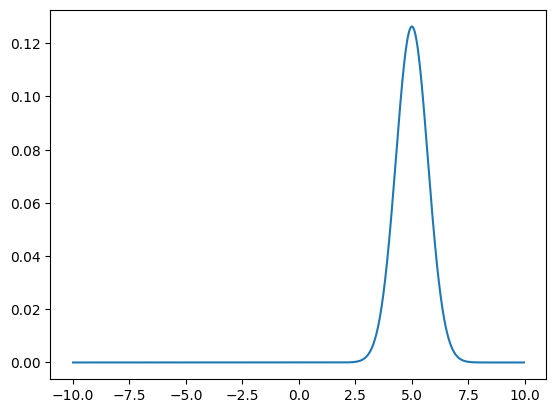

In [28]:
plt.plot(x[0:999], applying_weights_vector_position(), label='Potential Energy (V)')  # Plot the potential energy

In [41]:
eigvals.shape

(1000,)

In [48]:
def applying_weights_vector_time():
    time_dependance = np.zeros((N-2,), dtype=np.complex_)

    for ti in range(0, N-2):

        eval = 0

        for n in range(0, 100):

            t = ti * dt

            time_dependance[ti] = np.exp(-1j*eigvals[n]*t/hbar)

    return timeDependance

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


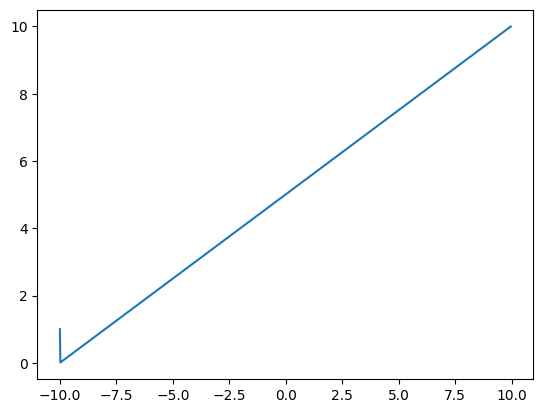

In [50]:
plt.plot(x[0:999], applying_weights_vector_time(), label='Potential Energy (V)')  # Plot the potential energy

In [33]:
PsiSol = applying_weights()

Check the output of the function.

In [34]:
# fig, ax = plt.subplots()
# line_abs, = ax.plot([], [], 'k-', label='Absolute Value')  # Line for absolute value
# line_real, = ax.plot([], [], 'r--', label='Real Part')  # Line for real part
# line_imag, = ax.plot([], [], 'b--', label='Imaginary Part')  # Line for imaginary part
# title = ax.set_title('')
# ax.set_xlim(xmin, xmax)
# Psi_max = np.amax(np.abs(PsiSol)**2)
# ax.set_ylim(-10*Psi_max, 10*Psi_max)
# ax.set_xlabel('X')
# ax.set_ylabel('Wave Function')
# ax2 = ax.twinx()
# ax2.plot(x, potential(x), 'k:', label='Potential Energy')
# ax2.set_ylabel('Potential Energy')

# # Combine the legend from both axes
# lines = [line_abs, line_real, line_imag]
# labels = [line.get_label() for line in lines]
# ax.legend(lines, labels, loc='upper left')

# # Directory to save frames
# frame_dir = "HarmonicOscillator/"

# # Ensure the directory exists
# import os
# if not os.path.exists(frame_dir):
#     os.makedirs(frame_dir)

# def animate(i):
#     line_abs.set_data(x[0:999], np.abs(PsiSol[:, i]))
#     line_real.set_data(x[0:999], np.real(PsiSol[:, i]))
#     line_imag.set_data(x[0:999], np.imag(PsiSol[:, i]))
#     title.set_text('Time = {0:1.3f}'.format(i * dt))

#     fig.canvas.draw()
#     fig.savefig(f"{frame_dir}/frame_{i:04d}.png")

#     return line_abs, line_real, line_imag, title

# anim = animation.FuncAnimation(fig, animate, frames=N-2, interval=50, blit=True)
# plt.show()

In [35]:
# HTML(anim.to_jshtml())

# Producing the dataset for the numerical solution.

## Producing the input part of a dataset.

In [149]:
# Define your data generation function
def generate_input_data(param):

    xmax = random.randrange(5, 20, 1)
    xmin = -xmax

    N = random.randrange(600, 1001, 1)
    hbar = 1
    omega = 1
    m = 0.5
    x = np.linspace(xmin, xmax, N)
    dx = (xmax - xmin)/(N + 1)
    U = 0.5**m*(omega**2)*(x**2)
    k = N - 1
    scale = 10
    tf = 10
    mom = random.randrange(1, 10, 1)

    #The abreviation is the parentesies in front of name are: I - Initial R - Resulting; N - Number: M - Matrix; R - Real; C - Complex 
    return {
        "(I/N/R) X Minimum": xmin,
        "(I/N/R) X maximum": xmax,
        "(I/M/R) Position Range": x,
        "(I/N/R) Hbar": hbar,
        "(I/N/R) Omega": omega,
        "(I/N/R) Number of Segents": N,
        "(I/N/R) Time Final": tf,
        "(I/M/R) Potential Energy Function": U,
        "(I/N/R) Segments of Position": dx,
        "(I/N/R) Momentum": mom
    }

# Collect the data
data_input_final = []
parameters = range(1000)


Functions to serialize and deserialize the complex matrix.

In [150]:
# Function to serialize the complex matrix
def complex_matrix_to_string(matrix):
    """
    Serializes a complex matrix to a string.

    Parameters:
    matrix (np.ndarray): A complex matrix to serialize.

    Returns:
    str: A string representing the complex matrix.
    """
    if isinstance(matrix, np.ndarray):
        if matrix.ndim == 2:  # 2D array
            return ';'.join([','.join(f"{elem.real}+{elem.imag}j" for elem in row) for row in matrix])
        elif matrix.ndim == 1:  # 1D array
            return ','.join(f"{elem.real}+{elem.imag}j" for elem in matrix)
    else:
        raise TypeError("Unsupported data type for serialization")

# Function to deserialize the string back to a complex matrix
def string_to_complex_matrix(matrix_str):
    """
    Deserializes a string back to a complex matrix.

    Parameters:
    matrix_str (str): A string representing the complex matrix.

    Returns:
    np.ndarray: A complex matrix.
    """
    if ';' in matrix_str:  # Check if it's a 2D array
        rows = matrix_str.split(';')
        matrix = [list(map(lambda s: complex(*map(float, s.rstrip('j').split('+'))), row.split(','))) for row in rows]
        return np.array(matrix, dtype=np.complex_)
    elif ',' in matrix_str:  # Check if it's a 1D array
        return np.array(list(map(lambda s: complex(*map(float, s.rstrip('j').split('+'))), matrix_str.split(','))), dtype=np.complex_)
    else:  # Handle the case of a single complex number string
        return np.array([complex(*map(float, matrix_str.rstrip('j').split('+')))], dtype=np.complex_)

Functions to serialize and deserialize the simple matrix.

In [151]:
# Function to serialize the matrix
def matrix_to_string(matrix):
    if isinstance(matrix, np.ndarray):
        if matrix.ndim == 2:  # 2D array
            return ';'.join([','.join(map(str, row)) for row in matrix])
        elif matrix.ndim == 1:  # 1D array
            return ','.join(map(str, matrix))
    elif isinstance(matrix, (int, float, np.float64)):  # Single number
        return str(matrix)
    else:
        raise TypeError("Unsupported data type for serialization")

# Function to deserialize the string back to a matrix
def string_to_matrix(matrix_str):
    matrix_str = matrix_str.strip()  # Remove any leading/trailing whitespace
    if matrix_str.startswith('[') and matrix_str.endswith(']'):
        # It's a numpy array formatted as a string
        # Replace multiple spaces with a single space, then split
        cleaned_str = ' '.join(matrix_str[1:-1].split())
        return np.fromstring(cleaned_str, sep=' ')
    elif ';' in matrix_str:  # Check if it's a 2D array
        rows = matrix_str.split(';')
        matrix = [list(map(float, row.split(','))) for row in rows]
        return np.array(matrix)
    elif ',' in matrix_str:  # Check if it's a 1D array
        return np.array(list(map(float, matrix_str.split(','))))
    else:  # Single float value
        return float(matrix_str)

Serializing initial data.

In [152]:
for param in parameters:
    result = generate_input_data(param)
    matrix_str_psition_range = matrix_to_string(result["(I/M/R) Position Range"])
    matrix_str_potential_energy_function = matrix_to_string(result["(I/M/R) Potential Energy Function"])
    data_input_final.append({
        "(I/N/R) X Minimum": result["(I/N/R) X Minimum"],
        "(I/N/R) X maximum": result["(I/N/R) X maximum"],
        "(I/M/R) Position Range": matrix_str_psition_range,
        "(I/N/R) Hbar": result["(I/N/R) Hbar"],
        "(I/N/R) Omega": result["(I/N/R) Omega"],
        "(I/N/R) Number of Segents": result["(I/N/R) Number of Segents"],
        "(I/N/R) Time Final": result["(I/N/R) Time Final"],
        "(I/M/R) Potential Energy Function": matrix_str_potential_energy_function,
        "(I/N/R) Segments of Position": result["(I/N/R) Segments of Position"],
        "(I/N/R) Momentum": result["(I/N/R) Momentum"],

        # Add an extra column for the result values with None values initially
        
        "(F/M/R) Eigenvalue Results": None,
        "(F/M/R) Eigervercor Results": None,
        "(F/M/R) Constant Multiplier Results": None,
        "(F/N/R) Solution": None
        })

# Convert to DataFrame and save to CSV
df_final = pd.DataFrame(data_input_final)
df_final.to_csv('dataset_with_numerical_sol.csv', index=False)

df_final = pd.read_csv('dataset_with_numerical_sol.csv') 

In [153]:
df_final

,(I/N/R) X Minimum,(I/N/R) X maximum,(I/M/R) Position Range,(I/N/R) Hbar,(I/N/R) Omega,(I/N/R) Number of Segents,(I/N/R) Time Final,(I/M/R) Potential Energy Function,(I/N/R) Segments of Position,(I/N/R) Momentum,(F/M/R) Eigenvalue Results,(F/M/R) Eigervercor Results,(F/M/R) Constant Multiplier Results,(F/N/R) Solution
0,-8,8,"-8.0,-7.982795698924731,-7.965591397849463,-7....",1,1,931,10,"45.254833995939045,45.0603988437493,44.8663822...",0.017167,8,NaN,NaN,NaN,NaN
1,-8,8,"-8.0,-7.976608187134503,-7.953216374269006,-7....",1,1,685,10,"45.254833995939045,44.99057275641897,44.727085...",0.023324,6,NaN,NaN,NaN,NaN
2,-19,19,"-19.0,-18.94864864864865,-18.897297297297296,-...",1,1,741,10,"255.26554800834367,253.88759884853243,252.5133...",0.051213,6,NaN,NaN,NaN,NaN
3,-17,17,"-17.0,-16.95520421607378,-16.910408432147563,-...",1,1,760,10,"204.35385976291224,203.27831499958702,202.2056...",0.044678,4,NaN,NaN,NaN,NaN
4,-7,7,"-7.0,-6.976897689768977,-6.9537953795379535,-6...",1,1,607,10,"34.64823227814083,34.41990846970947,34.1923394...",0.023026,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16,16,"-16.0,-15.956815114709851,-15.913630229419702,...",1,1,742,10,"181.01933598375618,180.04349228398888,179.0702...",0.043069,6,NaN,NaN,NaN,NaN
996,-16,16,"-16.0,-15.957219251336898,-15.914438502673796,...",1,1,749,10,"181.01933598375618,180.05261228576748,179.0884...",0.042667,6,NaN,NaN,NaN,NaN
997,-19,19,"-19.0,-18.960621761658032,-18.92124352331606,-...",1,1,966,10,"255.26554800834367,254.20854894461564,253.1537...",0.039297,2,NaN,NaN,NaN,NaN
998,-17,17,"-17.0,-16.964360587002098,-16.928721174004192,...",1,1,955,10,"204.35385976291224,203.4979283064647,202.64379...",0.035565,2,NaN,NaN,NaN,NaN


Deserializing initial data.

In [154]:
# Read the CSV file
df_final = pd.read_csv('dataset_with_numerical_sol.csv')

# Apply the deserialization function where necessary
df_final["(I/M/R) Position Range"] = df_final["(I/M/R) Position Range"].apply(string_to_matrix)
df_final["(I/M/R) Potential Energy Function"] = df_final["(I/M/R) Potential Energy Function"].apply(string_to_matrix)

In [155]:
df_final

,(I/N/R) X Minimum,(I/N/R) X maximum,(I/M/R) Position Range,(I/N/R) Hbar,(I/N/R) Omega,(I/N/R) Number of Segents,(I/N/R) Time Final,(I/M/R) Potential Energy Function,(I/N/R) Segments of Position,(I/N/R) Momentum,(F/M/R) Eigenvalue Results,(F/M/R) Eigervercor Results,(F/M/R) Constant Multiplier Results,(F/N/R) Solution
0,-8,8,"[-8.0, -7.982795698924731, -7.965591397849463,...",1,1,931,10,"[45.254833995939045, 45.0603988437493, 44.8663...",0.017167,8,NaN,NaN,NaN,NaN
1,-8,8,"[-8.0, -7.976608187134503, -7.953216374269006,...",1,1,685,10,"[45.254833995939045, 44.99057275641897, 44.727...",0.023324,6,NaN,NaN,NaN,NaN
2,-19,19,"[-19.0, -18.94864864864865, -18.89729729729729...",1,1,741,10,"[255.26554800834367, 253.88759884853243, 252.5...",0.051213,6,NaN,NaN,NaN,NaN
3,-17,17,"[-17.0, -16.95520421607378, -16.91040843214756...",1,1,760,10,"[204.35385976291224, 203.27831499958702, 202.2...",0.044678,4,NaN,NaN,NaN,NaN
4,-7,7,"[-7.0, -6.976897689768977, -6.9537953795379535...",1,1,607,10,"[34.64823227814083, 34.41990846970947, 34.1923...",0.023026,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16,16,"[-16.0, -15.956815114709851, -15.9136302294197...",1,1,742,10,"[181.01933598375618, 180.04349228398888, 179.0...",0.043069,6,NaN,NaN,NaN,NaN
996,-16,16,"[-16.0, -15.957219251336898, -15.9144385026737...",1,1,749,10,"[181.01933598375618, 180.05261228576748, 179.0...",0.042667,6,NaN,NaN,NaN,NaN
997,-19,19,"[-19.0, -18.960621761658032, -18.9212435233160...",1,1,966,10,"[255.26554800834367, 254.20854894461564, 253.1...",0.039297,2,NaN,NaN,NaN,NaN
998,-17,17,"[-17.0, -16.964360587002098, -16.9287211740041...",1,1,955,10,"[204.35385976291224, 203.4979283064647, 202.64...",0.035565,2,NaN,NaN,NaN,NaN


Check of the assignment function.

In [156]:
# # Extract the first row 
# first_row = df_final.iloc[0]

# # Extract values from the first row
# new_xmin = first_row["(I/N/R) X Minimum"]
# new_xmax = first_row["(I/N/R) X maximum"]
# new_hbar = first_row["(I/N/R) Hbar"]
# new_omega = first_row["(I/N/R) Omega"]
# new_N = first_row["(I/N/R) Number of Segents"]
# new_tf = first_row["(I/N/R) Time Final"]
# new_mom = first_row["(I/N/R) Momentum"]

# # Call the function to assign new values
# assign_constants_valutes(new_N, new_hbar, new_omega, new_xmin, new_xmax, new_tf, new_mom)

# # Display updated values
# print("\nUpdated Values:")
# print("N =", N)
# print("hbar =", hbar)
# print("omega =", omega)
# print("m =", m)
# print("xmin =", xmin)
# print("xmax =", xmax)
# print("dx =", dx)
# print("U[0] =", U[0])  # Displaying the first element of U for brevity
# print("k =", k)
# print("scale =", scale)
# print("tf =", tf)
# print("timeDependance[0] =", timeDependance[0])  # Displaying the first element of timeDependance for brevity
# print("dt =", dt)
# print("eval =", eval)
# print("mom =", mom)

## Producing the output part of a dataset

In [1]:
# Initialize a list to store the time taken for each iteration
iteration_times = []

# Record the start time of the entire loop
total_start_time = time.time()

# Iterate through each row of the DataFrame
for index, row in df_final.iterrows():

    # Record the start time of the current iteration
    start_time = time.time()

    # Extract values from the first row
    new_xmin = row["(I/N/R) X Minimum"]
    new_xmax = row["(I/N/R) X maximum"]
    new_hbar = row["(I/N/R) Hbar"]
    new_omega = row["(I/N/R) Omega"]
    new_N = row["(I/N/R) Number of Segents"]
    new_tf = row["(I/N/R) Time Final"]
    new_mom = row["(I/N/R) Momentum"]

    # Call the function to assign new values
    assign_constants_valutes(new_N, new_hbar, new_omega, new_xmin, new_xmax, new_tf, new_mom)

    ### CALCULATE EIGENSTATES ###
    eigvals, eigvecs = prepare_eigenvalues_eigenvectors()
    ### CALCULATE WAVE PACKET ###
    wp = wave_packet(pos=xmax/2,mom=-5,sigma=1)
    ### CALCULATE CONSTANTS ###
    ci = weights_for_harmonic_ocilator()
    ### CALCULATE FINAL SOLUTION OF THE EQUATION ###
    PsiSol = applying_weights()

    matrix_str_eigenvalue = matrix_to_string(eigvals)
    matrix_str_eigenvector = matrix_to_string(eigvecs)
    matrix_str_constant_multiplier = complex_matrix_to_string(ci)
    matrix_str_solution = complex_matrix_to_string(PsiSol)

    # Read the CSV file
    df_final = pd.read_csv('dataset_with_numerical_sol.csv')

    # Update the DataFrame in memory
    df_final.at[index, "(F/M/R) Eigenvalue Results"] = matrix_str_eigenvalue
    df_final.at[index, "(F/M/R) Eigervercor Results"] = matrix_str_eigenvector
    df_final.at[index, "(F/M/R) Constant Multiplier Results"] = matrix_str_constant_multiplier
    df_final.at[index, "(F/N/R) Solution"] = matrix_str_solution

    # Record the end time of the current iteration
    end_time = time.time()

    # Calculate the time taken for the current iteration
    iteration_time = end_time - start_time
    iteration_times.append(iteration_time)

    # Print the time taken for the current iteration
    print(f"Iteration {index} took {iteration_time:.6f} seconds")

    # Apply the deserialization function where necessary
    df_final.at[index, "(F/M/R) Eigenvalue Results"] = string_to_matrix(df_final.at[index, "(F/M/R) Eigenvalue Results"])
    df_final.at[index, "(F/M/R) Eigervercor Results"] = string_to_matrix(df_final.at[index, "(F/M/R) Eigervercor Results"])
    df_final.at[index, "(F/M/R) Constant Multiplier Results"] = string_to_complex_matrix(df_final.at[index, "(F/M/R) Constant Multiplier Results"])
    df_final.at[index, "(F/N/R) Solution"] = string_to_complex_matrix(df_final.at[index, "(F/N/R) Solution"])

    # Save the DataFrame again if deserialization results need to be saved
    df_final.to_csv('dataset_with_numerical_sol.csv', index=False)

# Record the end time of the entire loop
total_end_time = time.time()

# Calculate the total time taken for the entire loop
total_time = total_end_time - total_start_time

# Calculate the average time per iteration
average_time = total_time / 10

# Print the total and average times
print(f"\nTotal time for {10} iterations: {total_time:.6f} seconds")
print(f"Average time per iteration: {average_time:.6f} seconds")


# Save the updated DataFrame to CSV once at the end
df_final.to_csv('dataset_with_numerical_sol.csv', index=False)

# Read the CSV file (if needed)
df_final = pd.read_csv('dataset_with_numerical_sol.csv')


In [158]:
df_final

,(I/N/R) X Minimum,(I/N/R) X maximum,(I/M/R) Position Range,(I/N/R) Hbar,(I/N/R) Omega,(I/N/R) Number of Segents,(I/N/R) Time Final,(I/M/R) Potential Energy Function,(I/N/R) Segments of Position,(I/N/R) Momentum,(F/M/R) Eigenvalue Results,(F/M/R) Eigervercor Results,(F/M/R) Constant Multiplier Results,(F/N/R) Solution
0,-8,8,"-8.0,-7.982795698924731,-7.965591397849463,-7....",1,1,931,10,"45.254833995939045,45.0603988437493,44.8663822...",0.017167,8,[5.01070644e-01 1.50320268e+00 2.50531622e+00 ...,[[-1.22123602e-09 9.45636219e-09 5.08472726e...,[-3.66472740e-02+0.j -1.17192380e-01+0.j 2.49...,[[-1.03776145e-11+0.00000000e+00j 4.96695687e...
1,-8,8,"-8.0,-7.976608187134503,-7.953216374269006,-7....",1,1,685,10,"45.254833995939045,44.99057275641897,44.727085...",0.023324,6,[5.01453439e-01 1.50434322e+00 2.50719879e+00 ...,[[ 1.91478665e-09 1.48289602e-08 -7.97503881e...,[ 3.67147990e-02+0.j -1.17378311e-01+0.j -2.49...,[[-1.52377958e-11+0.00000000e+00j -1.26382576e...
2,-19,19,"-19.0,-18.94864864864865,-18.897297297297296,-...",1,1,741,10,"255.26554800834367,253.88759884853243,252.5133...",0.051213,6,[5.01310145e-01 1.50384801e+00 2.50622101e+00 ...,[[-1.49481013e-16 8.76488488e-17 -6.01855731e...,[ 1.35793469e-08+0.j 1.02919924e-07+0.j 5.45...,[[ 2.05795573e-12+0.00000000e+00j 3.82608905e...
3,-17,17,"-17.0,-16.95520421607378,-16.910408432147563,-...",1,1,760,10,"204.35385976291224,203.27831499958702,202.2056...",0.044678,4,[5.01286167e-01 1.50379578e+00 2.50617994e+00 ...,[[ 2.62824278e-16 4.33925998e-16 2.57987364e...,[-4.90482934e-07+0.j 3.32877371e-06+0.j 1.57...,[[ 1.72156653e-13+0.00000000e+00j 1.79652258e...
4,-7,7,"-7.0,-6.976897689768977,-6.9537953795379535,-6...",1,1,607,10,"34.64823227814083,34.41990846970947,34.1923394...",0.023026,7,[5.01641826e-01 1.50490880e+00 2.50814253e+00 ...,[[-6.99007486e-08 -4.68533638e-07 2.16588628e...,[-7.76416484e-02+0.j 2.17174368e-01+0.j 3.96...,[[-7.78651149e-10+0.00000000e+00j 3.37637009e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16,16,"-16.0,-15.956815114709851,-15.913630229419702,...",1,1,742,10,"181.01933598375618,180.04349228398888,179.0702...",0.043069,6,[5.01320386e-01 1.50390287e+00 2.50636876e+00 ...,[[ 1.90557009e-16 -3.21064398e-16 3.80333745e...,[ 2.54373951e-06+0.j -1.62513325e-05+0.j -7.23...,[[-8.57011336e-15+0.00000000e+00j -4.84135462e...
996,-16,16,"-16.0,-15.957219251336898,-15.914438502673796,...",1,1,749,10,"181.01933598375618,180.05261228576748,179.0884...",0.042667,6,[5.01308300e-01 1.50386770e+00 2.50631268e+00 ...,[[-2.42971722e-16 -1.30599477e-16 -4.62119464e...,[-2.54297513e-06+0.j 1.62468585e-05+0.j -7.23...,[[-8.56240457e-15+0.00000000e+00j -7.38769184e...
997,-19,19,"-19.0,-18.960621761658032,-18.92124352331606,-...",1,1,966,10,"255.26554800834367,254.20854894461564,253.1537...",0.039297,2,[5.01012039e-01 1.50298765e+00 2.50486633e+00 ...,[[-7.12911762e-16 6.60471023e-18 -2.25861513e...,[ 1.34122046e-08+0.j -1.01753144e-07+0.j -5.40...,[[ 8.76395927e-13+0.00000000e+00j 4.20924835e...
998,-17,17,"-17.0,-16.964360587002098,-16.928721174004192,...",1,1,955,10,"204.35385976291224,203.4979283064647,202.64379...",0.035565,2,[5.01028371e-01 1.50304542e+00 2.50498306e+00 ...,[[ 2.42682388e-16 2.42999596e-16 1.62663819e...,[ 4.86830801e-07+0.j -3.30592964e-06+0.j 1.56...,[[ 1.21176092e-13+0.00000000e+00j 4.73840587e...


In [73]:
# Read the existing CSV file
df = pd.read_csv('dataset_with_numerical_sol_new.csv')

# Add new columns with default values
df['(F/N/R) Time Independant Solution'] = 0
df['(F/N/I) Time dependace Function'] = 0

# Add new columns with calculated values
# For example, let's add a new column based on an existing column
# if 'F/N/I) Solution' in df.columns:
#     df['(F/N/I) Solution'] = df['F/N/I) Solution']

# Save the updated DataFrame back to a CSV file
df.to_csv('dataset_with_numerical_sol_new.csv', index=False)

print("Columns added successfully!")

Columns added successfully!


In [74]:
df = pd.read_csv('dataset_with_numerical_sol_new.csv')

In [71]:
# Specify the columns to delete
columns_to_delete = ['new_column1', 'new_column2']

# Delete the specified columns
df.drop(columns=columns_to_delete, inplace=True)

# Save the updated DataFrame back to a CSV file
df.to_csv('dataset_with_numerical_sol_new.csv', index=False)

In [75]:
df

,(I/N/R) X Minimum,(I/N/R) X maximum,(I/M/R) Position Range,(I/N/R) Hbar,(I/N/R) Omega,(I/N/R) Number of Segents,(I/N/R) Time Final,(I/M/R) Potential Energy Function,(I/N/R) Segments of Position,(I/N/R) Momentum,(F/M/R) Eigenvalue Results,(F/M/R) Eigervercor Results,(F/M/R) Constant Multiplier Results,(F/N/I) Solution,(F/N/R) Time Independant Solution,(F/N/I) Time dependace Function
0,-8,8,"-8.0,-7.982795698924731,-7.965591397849463,-7....",1,1,931,10,"45.254833995939045,45.0603988437493,44.8663822...",0.017167,8,[5.01070644e-01 1.50320268e+00 2.50531622e+00 ...,[[-1.22123602e-09 9.45636219e-09 5.08472726e...,[-3.66472740e-02+0.j -1.17192380e-01+0.j 2.49...,[[-1.03776145e-11+0.00000000e+00j 4.96695687e...,0,0
1,-8,8,"-8.0,-7.976608187134503,-7.953216374269006,-7....",1,1,685,10,"45.254833995939045,44.99057275641897,44.727085...",0.023324,6,[5.01453439e-01 1.50434322e+00 2.50719879e+00 ...,[[ 1.91478665e-09 1.48289602e-08 -7.97503881e...,[ 3.67147990e-02+0.j -1.17378311e-01+0.j -2.49...,[[-1.52377958e-11+0.00000000e+00j -1.26382576e...,0,0
2,-19,19,"-19.0,-18.94864864864865,-18.897297297297296,-...",1,1,741,10,"255.26554800834367,253.88759884853243,252.5133...",0.051213,6,[5.01310145e-01 1.50384801e+00 2.50622101e+00 ...,[[-1.49481013e-16 8.76488488e-17 -6.01855731e...,[ 1.35793469e-08+0.j 1.02919924e-07+0.j 5.45...,[[ 2.05795573e-12+0.00000000e+00j 3.82608905e...,0,0
3,-17,17,"-17.0,-16.95520421607378,-16.910408432147563,-...",1,1,760,10,"204.35385976291224,203.27831499958702,202.2056...",0.044678,4,[5.01286167e-01 1.50379578e+00 2.50617994e+00 ...,[[ 2.62824278e-16 4.33925998e-16 2.57987364e...,[-4.90482934e-07+0.j 3.32877371e-06+0.j 1.57...,[[ 1.72156653e-13+0.00000000e+00j 1.79652258e...,0,0
4,-7,7,"-7.0,-6.976897689768977,-6.9537953795379535,-6...",1,1,607,10,"34.64823227814083,34.41990846970947,34.1923394...",0.023026,7,[5.01641826e-01 1.50490880e+00 2.50814253e+00 ...,[[-6.99007486e-08 -4.68533638e-07 2.16588628e...,[-7.76416484e-02+0.j 2.17174368e-01+0.j 3.96...,[[-7.78651149e-10+0.00000000e+00j 3.37637009e...,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16,16,"-16.0,-15.956815114709851,-15.913630229419702,...",1,1,742,10,"181.01933598375618,180.04349228398888,179.0702...",0.043069,6,[5.01320386e-01 1.50390287e+00 2.50636876e+00 ...,[[ 1.90557009e-16 -3.21064398e-16 3.80333745e...,[ 2.54373951e-06+0.j -1.62513325e-05+0.j -7.23...,[[-8.57011336e-15+0.00000000e+00j -4.84135462e...,0,0
996,-16,16,"-16.0,-15.957219251336898,-15.914438502673796,...",1,1,749,10,"181.01933598375618,180.05261228576748,179.0884...",0.042667,6,[5.01308300e-01 1.50386770e+00 2.50631268e+00 ...,[[-2.42971722e-16 -1.30599477e-16 -4.62119464e...,[-2.54297513e-06+0.j 1.62468585e-05+0.j -7.23...,[[-8.56240457e-15+0.00000000e+00j -7.38769184e...,0,0
997,-19,19,"-19.0,-18.960621761658032,-18.92124352331606,-...",1,1,966,10,"255.26554800834367,254.20854894461564,253.1537...",0.039297,2,[5.01012039e-01 1.50298765e+00 2.50486633e+00 ...,[[-7.12911762e-16 6.60471023e-18 -2.25861513e...,[ 1.34122046e-08+0.j -1.01753144e-07+0.j -5.40...,[[ 8.76395927e-13+0.00000000e+00j 4.20924835e...,0,0
998,-17,17,"-17.0,-16.964360587002098,-16.928721174004192,...",1,1,955,10,"204.35385976291224,203.4979283064647,202.64379...",0.035565,2,[5.01028371e-01 1.50304542e+00 2.50498306e+00 ...,[[ 2.42682388e-16 2.42999596e-16 1.62663819e...,[ 4.86830801e-07+0.j -3.30592964e-06+0.j 1.56...,[[ 1.21176092e-13+0.00000000e+00j 4.73840587e...,0,0


In [ ]:
# Initialize a list to store the time taken for each iteration
iteration_times = []

# Record the start time of the entire loop
total_start_time = time.time()

# Iterate through each row of the DataFrame
for index, row in df_final.iterrows():

    # Record the start time of the current iteration
    start_time = time.time()

    # Extract values from the first row
    new_xmin = row["(I/N/R) X Minimum"]
    new_xmax = row["(I/N/R) X maximum"]
    new_hbar = row["(I/N/R) Hbar"]
    new_omega = row["(I/N/R) Omega"]
    new_N = row["(I/N/R) Number of Segents"]
    new_tf = row["(I/N/R) Time Final"]
    new_mom = row["(I/N/R) Momentum"]

    # Call the function to assign new values
    assign_constants_valutes(new_N, new_hbar, new_omega, new_xmin, new_xmax, new_tf, new_mom)

    ### CALCULATE EIGENSTATES ###
    eigvals, eigvecs = prepare_eigenvalues_eigenvectors()
    ### CALCULATE WAVE PACKET ###
    wp = wave_packet(pos=xmax/2,mom=-5,sigma=1)
    ### CALCULATE CONSTANTS ###
    ci = weights_for_harmonic_ocilator()
    ### CALCULATE FINAL SOLUTION OF THE EQUATION ###
    PsiSol = applying_weights()

    time_dep = applying_weights_vector_position()
    time_indep = applying_weights_vector_time()

    vector_str_solution_position = matrix_to_string(time_indep)
    vector_str_solution_time = complex_matrix_to_string(time_dep)

    # Read the CSV file
    df_final = pd.read_csv('dataset_with_numerical_sol.csv')

    # Update the DataFrame in memory
    df_final.at[index, "(F/N/R) Time Independant Solution"] = vector_str_solution_position
    df_final.at[index, "(F/N/I) Time dependace Function"] = vector_str_solution_time

    # Record the end time of the current iteration
    end_time = time.time()

    # Calculate the time taken for the current iteration
    iteration_time = end_time - start_time
    iteration_times.append(iteration_time)

    # Print the time taken for the current iteration
    print(f"Iteration {index} took {iteration_time:.6f} seconds")

    # Apply the deserialization function where necessary
    df_final.at[index, "(F/N/R) Time Independant Solution"] = string_to_matrix(df_final.at[index, "(F/N/R) Time Independant Solution"])
    df_final.at[index, "(F/N/I) Time dependace Function"] = string_to_complex_matrix(df_final.at[index, "(F/N/I) Time dependace Function"])

    # Save the DataFrame again if deserialization results need to be saved
    df_final.to_csv('dataset_with_numerical_sol.csv', index=False)

# Record the end time of the entire loop
total_end_time = time.time()

# Calculate the total time taken for the entire loop
total_time = total_end_time - total_start_time

# Calculate the average time per iteration
average_time = total_time / 10

# Print the total and average times
print(f"\nTotal time for {10} iterations: {total_time:.6f} seconds")
print(f"Average time per iteration: {average_time:.6f} seconds")


# Save the updated DataFrame to CSV once at the end
df_final.to_csv('dataset_with_numerical_sol.csv', index=False)

# Read the CSV file (if needed)
df_final = pd.read_csv('dataset_with_numerical_sol.csv')


In [72]:
df

,(I/N/R) X Minimum,(I/N/R) X maximum,(I/M/R) Position Range,(I/N/R) Hbar,(I/N/R) Omega,(I/N/R) Number of Segents,(I/N/R) Time Final,(I/M/R) Potential Energy Function,(I/N/R) Segments of Position,(I/N/R) Momentum,(F/M/R) Eigenvalue Results,(F/M/R) Eigervercor Results,(F/M/R) Constant Multiplier Results,(F/N/I) Solution
0,-8,8,"-8.0,-7.982795698924731,-7.965591397849463,-7....",1,1,931,10,"45.254833995939045,45.0603988437493,44.8663822...",0.017167,8,[5.01070644e-01 1.50320268e+00 2.50531622e+00 ...,[[-1.22123602e-09 9.45636219e-09 5.08472726e...,[-3.66472740e-02+0.j -1.17192380e-01+0.j 2.49...,[[-1.03776145e-11+0.00000000e+00j 4.96695687e...
1,-8,8,"-8.0,-7.976608187134503,-7.953216374269006,-7....",1,1,685,10,"45.254833995939045,44.99057275641897,44.727085...",0.023324,6,[5.01453439e-01 1.50434322e+00 2.50719879e+00 ...,[[ 1.91478665e-09 1.48289602e-08 -7.97503881e...,[ 3.67147990e-02+0.j -1.17378311e-01+0.j -2.49...,[[-1.52377958e-11+0.00000000e+00j -1.26382576e...
2,-19,19,"-19.0,-18.94864864864865,-18.897297297297296,-...",1,1,741,10,"255.26554800834367,253.88759884853243,252.5133...",0.051213,6,[5.01310145e-01 1.50384801e+00 2.50622101e+00 ...,[[-1.49481013e-16 8.76488488e-17 -6.01855731e...,[ 1.35793469e-08+0.j 1.02919924e-07+0.j 5.45...,[[ 2.05795573e-12+0.00000000e+00j 3.82608905e...
3,-17,17,"-17.0,-16.95520421607378,-16.910408432147563,-...",1,1,760,10,"204.35385976291224,203.27831499958702,202.2056...",0.044678,4,[5.01286167e-01 1.50379578e+00 2.50617994e+00 ...,[[ 2.62824278e-16 4.33925998e-16 2.57987364e...,[-4.90482934e-07+0.j 3.32877371e-06+0.j 1.57...,[[ 1.72156653e-13+0.00000000e+00j 1.79652258e...
4,-7,7,"-7.0,-6.976897689768977,-6.9537953795379535,-6...",1,1,607,10,"34.64823227814083,34.41990846970947,34.1923394...",0.023026,7,[5.01641826e-01 1.50490880e+00 2.50814253e+00 ...,[[-6.99007486e-08 -4.68533638e-07 2.16588628e...,[-7.76416484e-02+0.j 2.17174368e-01+0.j 3.96...,[[-7.78651149e-10+0.00000000e+00j 3.37637009e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-16,16,"-16.0,-15.956815114709851,-15.913630229419702,...",1,1,742,10,"181.01933598375618,180.04349228398888,179.0702...",0.043069,6,[5.01320386e-01 1.50390287e+00 2.50636876e+00 ...,[[ 1.90557009e-16 -3.21064398e-16 3.80333745e...,[ 2.54373951e-06+0.j -1.62513325e-05+0.j -7.23...,[[-8.57011336e-15+0.00000000e+00j -4.84135462e...
996,-16,16,"-16.0,-15.957219251336898,-15.914438502673796,...",1,1,749,10,"181.01933598375618,180.05261228576748,179.0884...",0.042667,6,[5.01308300e-01 1.50386770e+00 2.50631268e+00 ...,[[-2.42971722e-16 -1.30599477e-16 -4.62119464e...,[-2.54297513e-06+0.j 1.62468585e-05+0.j -7.23...,[[-8.56240457e-15+0.00000000e+00j -7.38769184e...
997,-19,19,"-19.0,-18.960621761658032,-18.92124352331606,-...",1,1,966,10,"255.26554800834367,254.20854894461564,253.1537...",0.039297,2,[5.01012039e-01 1.50298765e+00 2.50486633e+00 ...,[[-7.12911762e-16 6.60471023e-18 -2.25861513e...,[ 1.34122046e-08+0.j -1.01753144e-07+0.j -5.40...,[[ 8.76395927e-13+0.00000000e+00j 4.20924835e...
998,-17,17,"-17.0,-16.964360587002098,-16.928721174004192,...",1,1,955,10,"204.35385976291224,203.4979283064647,202.64379...",0.035565,2,[5.01028371e-01 1.50304542e+00 2.50498306e+00 ...,[[ 2.42682388e-16 2.42999596e-16 1.62663819e...,[ 4.86830801e-07+0.j -3.30592964e-06+0.j 1.56...,[[ 1.21176092e-13+0.00000000e+00j 4.73840587e...


## Chich the Solution output.

In [159]:
# PsiSol = np.zeros((N-2, N-2), dtype=np.complex_)
# PsiSol

In [160]:
# PsiSol = df_final.at[0, "(F/N/R) Solution"]
# PsiSol

In [161]:
# fig, ax = plt.subplots()
# line_abs, = ax.plot([], [], 'k-', label='Absolute Value')  # Line for absolute value
# line_real, = ax.plot([], [], 'r--', label='Real Part')  # Line for real part
# line_imag, = ax.plot([], [], 'b--', label='Imaginary Part')  # Line for imaginary part
# title = ax.set_title('')
# ax.set_xlim(xmin, xmax)
# Psi_max = np.amax(np.abs(PsiSol)**2)
# ax.set_ylim(-10*Psi_max, 10*Psi_max)
# ax.set_xlabel('X')
# ax.set_ylabel('Wave Function')
# ax2 = ax.twinx()
# ax2.plot(x, potential(x), 'k:', label='Potential Energy')
# ax2.set_ylabel('Potential Energy')

# # Combine the legend from both axes
# lines = [line_abs, line_real, line_imag]
# labels = [line.get_label() for line in lines]
# ax.legend(lines, labels, loc='upper left')

# # Directory to save frames
# frame_dir = "HarmonicOscillator/"

# # Ensure the directory exists
# import os
# if not os.path.exists(frame_dir):
#     os.makedirs(frame_dir)

# def animate(i):
#     line_abs.set_data(x[0:809], np.abs(PsiSol[:, i]))
#     line_real.set_data(x[0:809], np.real(PsiSol[:, i]))
#     line_imag.set_data(x[0:809], np.imag(PsiSol[:, i]))
#     title.set_text('Time = {0:1.3f}'.format(i * dt))

#     fig.canvas.draw()
#     fig.savefig(f"{frame_dir}/frame_{i:04d}.png")

#     return line_abs, line_real, line_imag, title

# anim = animation.FuncAnimation(fig, animate, frames=N-2, interval=50, blit=True)
# plt.show()

In [162]:
# HTML(anim.to_jshtml())